<h1> Problem 4

Firstly, we import the required libraries.\
Numpy is required for basic matrix operations.\
Matplotlib is required for plotting.\
Sklearn provides tools to perform linear, polynomial and logistic regression.

In [227]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

We start by creating a equally spaced vector $x$ from 0 to 1, totalling 100 samples.

In [2]:
x = np.linspace(0,1,100)

Then, we create $y$, which is a $cos$ transform using $x$.

In [3]:
y = np.cos(2*np.pi*x)

Lets visualize $x$ and $y$.

Text(0.5, 1.0, 'X VS Y')

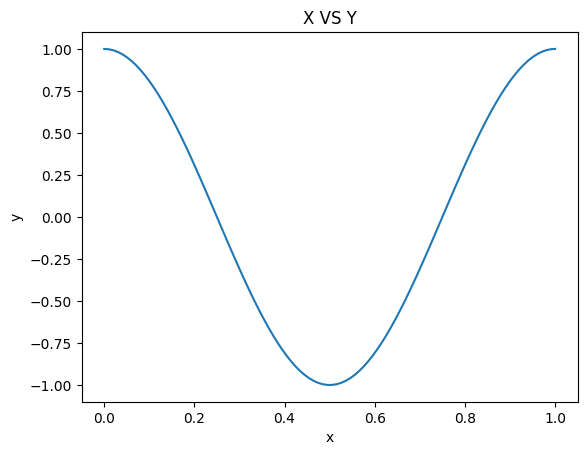

In [498]:
plt.figure()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("X VS Y")

We then add gaussian noise to $y$. This gives us $z$ vector

In [5]:
z = y+np.random.normal(0,0.1,np.shape(y))

Text(0.5, 1.0, 'X VS Z')

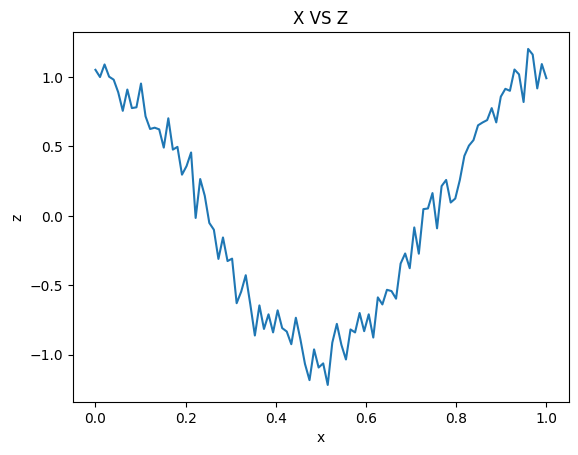

In [499]:
plt.figure()
plt.plot(x,z)
plt.xlabel("x")
plt.ylabel("z")
plt.title("X VS Z")

Now we start a polynomial fit on $z$ using $x$.\
Since we are not sure on the right fit, we go from 0 to $15^{th}$ order.\
We need to also split the data as training and testing, following an $\frac{80}{20}$ split respectively.

Parameters are  [0.         0.05193842] -0.03279677003418839


Parameters are  [ 0.         -8.98937429  9.03975984] 1.486109063966131


Parameters are  [ 0.         -9.54711684 10.48194946 -0.9382358 ] 1.507834124983906


Parameters are  [  0.           2.18737117 -41.94114673  79.85372497 -40.06469933] 0.9401260753826354


Parameters are  [  0.           2.87622077 -48.53638455  98.81999142 -61.89402298
   8.79754839] 0.9613737617032214


Parameters are  [   0.           -0.56717314  -11.60478305  -49.70708121  214.45335774
 -231.52173464   79.02493082] 0.9985708920315465


Parameters are  [    0.            -4.16631465    37.85399168  -324.07967694
   962.7282455  -1302.03341551   849.97831022  -220.36031798] 1.0824131652955247


Parameters are  [    0.            -2.1224681     -9.56873446    25.75370566
  -278.2880997   1107.192364   -1772.66632734  1282.60282438
  -352.9478951 ] 1.0695204901079183


Parameters are  [ 0.00000000e+00 -7.08488874e+00  1.07921017e+02 -1.03447674e+03


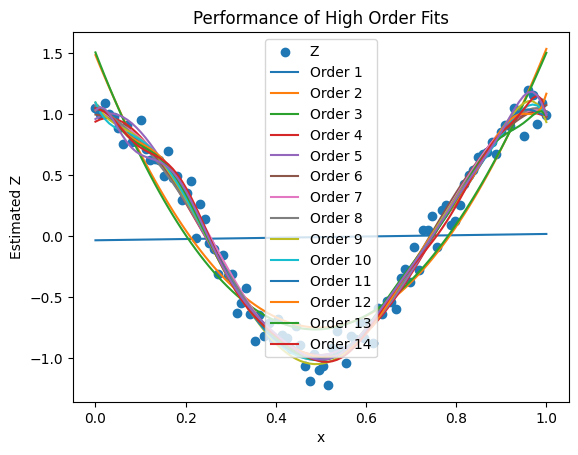

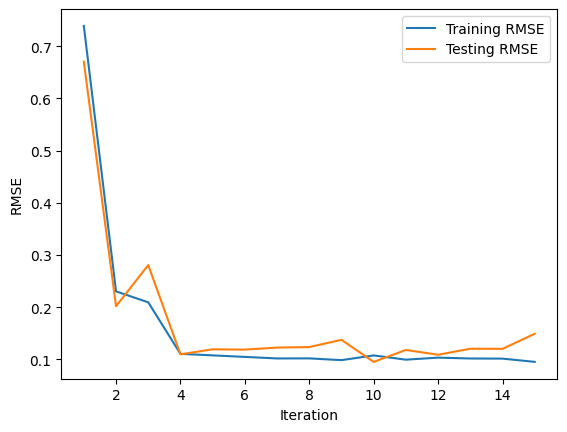

In [505]:
plt.scatter(x,z)
plt.title("Performance of High Order Fits")
plt.xlabel("x")
plt.ylabel("Estimated Z")
test_scores = [] #Store test RMSE
train_scores = [] #Store training RMSE
for itr in range(15):
    x_train,x_test,z_train,z_test = train_test_split(x,z,test_size=0.2,shuffle=True)
    mdl = PolynomialFeatures(degree=itr+1)
    mdl.fit_transform(x_train.reshape(len(x_train),1))
    modelx = make_pipeline(mdl,LinearRegression())
    modelx.fit(x_train.reshape(len(x_train),1),z_train)
    train_scores.append(mean_squared_error(z_train,modelx.predict(x_train.reshape(len(x_train),1)),squared=False))
    print("Parameters are ",modelx.steps[1][1].coef_,modelx.steps[1][1].intercept_)
    print("\n")
    test_scores.append(mean_squared_error(z_test,modelx.predict(x_test.reshape(len(x_test),1)),squared=False))
    plt.plot(x,modelx.predict(x.reshape(100,1)))
plt.legend(["Z","Order 1","Order 2","Order 3","Order 4","Order 5","Order 6","Order 7","Order 8","Order 9"
            ,"Order 10","Order 11","Order 12","Order 13","Order 14"])
plt.figure()
plt.plot(np.linspace(1,len(train_scores),len(train_scores)),train_scores)
plt.plot(np.linspace(1,len(test_scores),len(test_scores)),test_scores)
plt.ylabel("RMSE")
plt.xlabel("Iteration")
plt.legend(["Training RMSE","Testing RMSE"])

As seen above, until Order $6$, the coefficients and intercept are well within bounds.\
However, starting from the $7^{th}$ order, the coefficients blow up.\
This is a strong indication of overfit which is also visualized from the RMSE plot. We see that while training loss converges, test loss fluctuates randomly. This is a sign that the model is not generalized.\
Thus the critical value of Order of fit in this case would be $\textbf{6}$.

In order to solve overfitting, we can apply regularization techniques, namely, Lasso and Ridge regression.\
Lasso and Ridge regression apply conditioning term to the cost function that prevents coefficients from blowing up.\
This helps in keeping the model in check and avoid any overfitting, thus, improving generalization.\
For this example, I have used Sklearn to implement Lasso and Ridge regression. While Ridge regression can be solved analytically, Lasso regression cannot be solved easily, hence, using this package helps reach answer faster.\
We start with Lasso Regression.

Parameters are  [0.        0.0503122] -0.0053938529720463195


Parameters are  [ 0.         -9.24350451  9.26218523] 1.5349183740926893


Parameters are  [ 0.         -9.28842003  9.42071307 -0.10513219] 1.5406608171828389


Parameters are  [ 0.         -8.52993176  5.26078826  7.9414565  -4.74532386] 1.4723735768801176


Parameters are  [ 0.         -7.52746722  1.07994045 10.47071805  1.72285996 -5.96666108] 1.4270729640172992


Parameters are  [ 0.         -6.38843617 -1.909557   10.15214667  4.53272549 -1.2062064
 -5.46566363] 1.3796972326257637


Parameters are  [ 0.         -5.59570363 -3.44927377  9.48587878  5.1244759   0.36428111
 -2.28646418 -3.93776002] 1.3271386335211657


Parameters are  [ 0.         -5.45048451 -3.24114722  8.19616575  4.98460842  1.12694858
 -0.90557068 -2.36683907 -2.75744381] 1.3098453816317783


Parameters are  [ 0.         -5.57589072 -2.82975657  8.06551108  4.46913589  0.86950776
 -0.72088186 -1.65776503 -1.6537995  -1.35580342] 1.3258235262306655


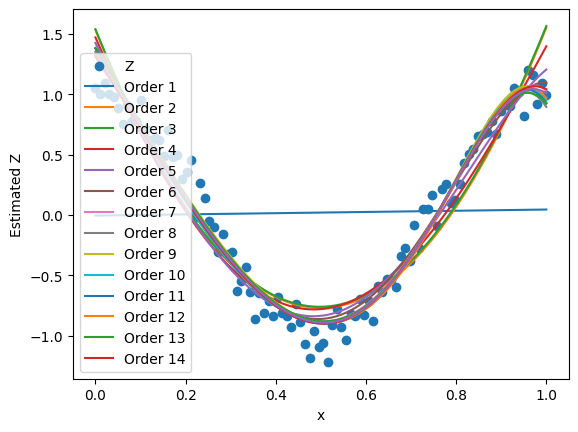

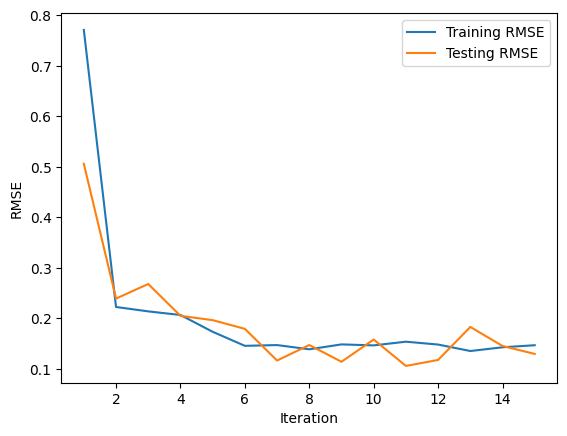

In [513]:
from sklearn.linear_model import Lasso #import lasso model
plt.scatter(x,z)
plt.xlabel("x")
plt.ylabel("Estimated Z")
test_scores = []
train_scores = []
for itr in range(15):
    x_train,x_test,z_train,z_test = train_test_split(x,z,test_size=0.2,shuffle=True)
    mdl = PolynomialFeatures(degree=itr+1)
    mdl.fit_transform(x_train.reshape(len(x_train),1))
    modelx = make_pipeline(mdl,Lasso(alpha=1e-5)) #Changing alpha to 1 creates poor fit due to over simplification of coefficients
    modelx.fit(x_train.reshape(len(x_train),1),z_train)
    train_scores.append(mean_squared_error(z_train,modelx.predict(x_train.reshape(len(x_train),1)),squared=False))
    print("Parameters are ",modelx.steps[1][1].coef_,modelx.steps[1][1].intercept_)
    print("\n")
    test_scores.append(mean_squared_error(z_test,modelx.predict(x_test.reshape(len(x_test),1)),squared=False))
    plt.plot(x,modelx.predict(x.reshape(100,1)))
plt.legend(["Z","Order 1","Order 2","Order 3","Order 4","Order 5","Order 6","Order 7","Order 8","Order 9"
            ,"Order 10","Order 11","Order 12","Order 13","Order 14"])
plt.figure()
plt.plot(np.linspace(1,len(train_scores),len(train_scores)),train_scores)
plt.plot(np.linspace(1,len(test_scores),len(test_scores)),test_scores)
plt.ylabel("RMSE")
plt.xlabel("Iteration")
plt.legend(["Training RMSE","Testing RMSE"])

Here we see that,\
 1) The model coefficients for order upto 15 are within bounds. No model has unusally large coefficients or intercepts. This helps us understand that the model is prevented from overfitting due to generalization.\
 2) Training and Testing RMSE follow each other closely. This is another sign that the model is not overfitted.\
 3) Finally, for this model the value of $\alpha = 1e-5$ and it was observed that increasing $\alpha$ towards 1 over regularizes the model i.e. makes coefficients 0, causing improper fit.\
 4) Using Lasso Regression, we can prevent overfitting beyond $6^{th}$ order.

Ridge Regression is another way of adding regularization to higher order models to prevent overfit.\
We use almost the same setting as Lasso Regression and check results.

Parameters are  [0.         0.04610654] 0.0011798374494524574


Parameters are  [ 0.         -8.90487804  9.01527526] 1.4495097470393152


Parameters are  [ 0.         -8.76668332  8.50812118  0.31846166] 1.4755001362312716


Parameters are  [  0.           1.23262485 -37.58633543  72.97889507 -36.59370865] 0.9945707817115148


Parameters are  [  0.           0.78310793 -32.60686027  55.49703586 -13.46152838
 -10.23362104] 1.0083325007091202


Parameters are  [  0.           0.78061461 -32.39475671  51.36602725   4.54941763
 -36.13011964  11.8482508 ] 1.0052686104892592


Parameters are  [  0.           1.45920443 -32.5245731   40.13648163  23.84093796
 -24.45773999 -28.90299858  20.56423776] 0.951923356039366


Parameters are  [  0.           0.94734338 -29.97216863  36.76947603  19.00111143
 -14.60851355 -19.89569848  -3.67531012  11.50845442] 0.9883644644986973


Parameters are  [ 0.00000000e+00  1.71860151e-02 -2.61533061e+01  3.23635543e+01
  1.87301483e+01 -1.27014241e+01 -1.8754

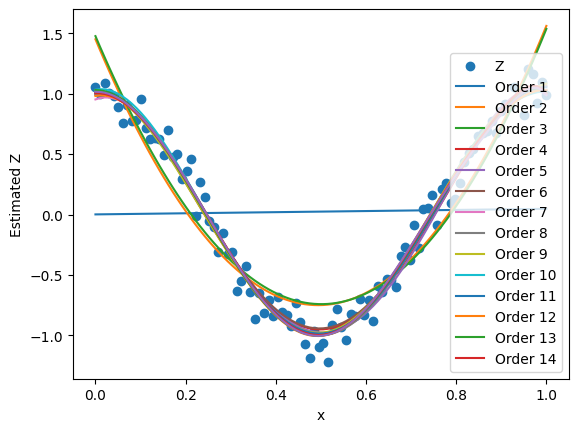

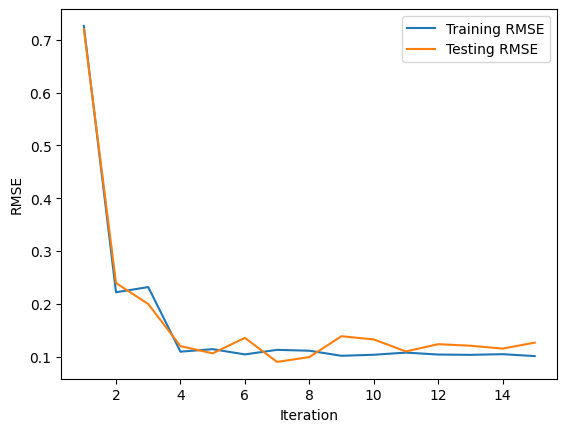

In [516]:
from sklearn.linear_model import Ridge
plt.scatter(x,z)
plt.xlabel("x")
plt.ylabel("Estimated Z")
test_scores = []
train_scores = []
for itr in range(15):
    x_train,x_test,z_train,z_test = train_test_split(x,z,test_size=0.2,shuffle=True)
    mdl = PolynomialFeatures(degree=itr+1)
    mdl.fit_transform(x_train.reshape(len(x_train),1))
    modelx = make_pipeline(mdl,Ridge(alpha=1e-5)) #Changing alpha to 1 overly simplifies the model causing bad fit
    modelx.fit(x_train.reshape(len(x_train),1),z_train)
    train_scores.append(mean_squared_error(z_train,modelx.predict(x_train.reshape(len(x_train),1)),squared=False))
    print("Parameters are ",modelx.steps[1][1].coef_,modelx.steps[1][1].intercept_)
    print("\n")
    test_scores.append(mean_squared_error(z_test,modelx.predict(x_test.reshape(len(x_test),1)),squared=False))
    plt.plot(x,modelx.predict(x.reshape(100,1)))
plt.legend(["Z","Order 1","Order 2","Order 3","Order 4","Order 5","Order 6","Order 7","Order 8","Order 9"
            ,"Order 10","Order 11","Order 12","Order 13","Order 14"])
plt.figure()
plt.plot(np.linspace(1,len(train_scores),len(train_scores)),train_scores)
plt.plot(np.linspace(1,len(test_scores),len(test_scores)),test_scores)
plt.ylabel("RMSE")
plt.xlabel("Iteration")
plt.legend(["Training RMSE","Testing RMSE"])

In Ridge Regression as well it was seen that,\
1) Adding regularization term to model cost function prevents model coefficients from blowing up. This prevented the overfit beyond $6^{th}$ order.
2) Training and Testing RMSE followed each other closely. This was also seen in Lasso Regression.
3) For this model the $\alpha = 1e-5$. It was observed that changing $\alpha$ to 1 overly simplifies the model causing bad fit.
4) Based on the performance, Ridge Regression performed the best.

<h1> Problem 5

In [519]:
import pandas as pd

In [520]:
daf = pd.read_csv("C:/Users/osave/Downloads/HW1_P5_weatherHistory.csv") #Importing the data

The idea behind creating this dataframe was that all features with numerical inputs were chosen to be a part of this dataframe.\
A quick visualization of the dataframe shows that the data was correctly processed.

In [521]:
df = pd.DataFrame(daf,columns=["Temperature (C)","Apparent Temperature (C)","Humidity","Visibility (km)","Pressure (millibars)"])
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,15.8263,1015.13
1,9.355556,7.227778,0.86,15.8263,1015.63
2,9.377778,9.377778,0.89,14.9569,1015.94
3,8.288889,5.944444,0.83,15.8263,1016.41
4,8.755556,6.977778,0.83,15.8263,1016.51


Inorder for choosing features for the linear regression model, it is important to visualize the correlation between the features. This would tell us the insights to drop any feature in the model.

In [522]:
df.corr().style.background_gradient(cmap='coolwarm')

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.369173,0.005454
Visibility (km),0.392847,0.381718,-0.369173,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,0.059818,1.000000


A correlation value closer to 0 shows no relation between the corresponding parameters. Using that background, we can drop Pressure.\
Thus, dropping pressure and rechecking the data.

In [523]:
df = df.drop(labels = "Pressure (millibars)",axis=1)
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
0,9.472222,7.388889,0.89,15.8263
1,9.355556,7.227778,0.86,15.8263
2,9.377778,9.377778,0.89,14.9569
3,8.288889,5.944444,0.83,15.8263
4,8.755556,6.977778,0.83,15.8263


Now we can run a quick correlation in the reduced dataframe to check the relationship between features.

In [96]:
df.corr().style.background_gradient(cmap='coolwarm')

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
Temperature (C),1.000000,0.992629,-0.632255,0.392847
Apparent Temperature (C),0.992629,1.000000,-0.602571,0.381718
Humidity,-0.632255,-0.602571,1.000000,-0.369173
Visibility (km),0.392847,0.381718,-0.369173,1.000000


We can observe that,\
1) Temperature and Apparent Temperature has a very high correlation. If one goes up, the other goes up.
2) Humidity and Temperature has negative correlation. This means, increase in humidity decreases temperature.
3) Visibility also has a poor correlation with Temperature. If visibility is high, temperature is high.

However, for the sake of initial model, we will only focus on Temperature and Humidity.

Quickly plotting Temperature and Humidity describes the relation found using correlation matrix.\
We can clearly see the two parameters are negatively correlated.

Text(0.5, 1.0, 'Temperature Vs Humidity')

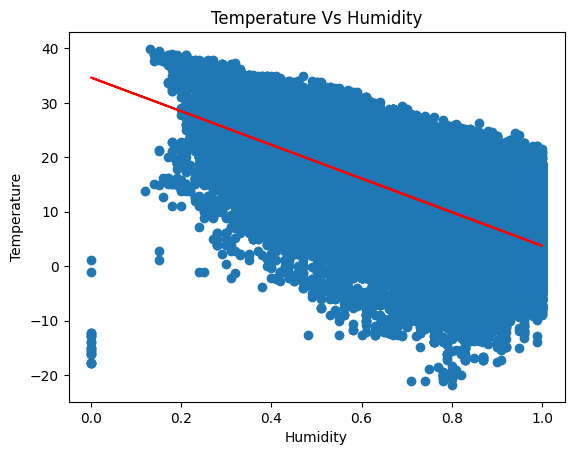

In [104]:
plt.figure()
plt.scatter(df.iloc[:,2],df.iloc[:,0])
temp_a,temp_b = np.polyfit(df.iloc[:,2],df.iloc[:,0],1)
plt.plot(df.iloc[:,2],temp_a*df.iloc[:,2]+temp_b,color = 'red')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Temperature Vs Humidity")

In this section, we build the required linear model to uncover the relationship between Temperature and Humidity.\
The order of said model is 1.

In [531]:
from sklearn.linear_model import SGDRegressor
x_train,x_test,z_train,z_test = train_test_split(df.iloc[:,[2]],df.iloc[:,0],test_size=0.2,shuffle=True)

First, we explore the effect of learning rate.\
Kindly, change the $lr$ parameter below, using only SGDRegressor model to see the effect of learning rate.\
Learning rate was set to constant.

In [532]:
lr = 1e-3 #Change Learning Rate
#Uncomment the Model of Choice
#modelx = LinearRegression(normalize=True) #Simple Linear Regression using ODE Solver
modelx = SGDRegressor(loss = "squared_error",learning_rate="constant",eta0=lr) #Linear Regression using SGD Optimizer

In [533]:
modelx.fit(np.array(x_train).reshape(len(z_train),1),np.array(z_train).reshape(len(z_train),1))

SGDRegressor(eta0=0.001, learning_rate='constant')

In [534]:
print("RMSE is ",mean_squared_error(np.array(z_test).reshape(len(z_test),1),modelx.predict(np.array(x_test).reshape(len(z_test),1)),squared=False))

RMSE is  7.428794663508852


In [535]:
print("Test R squared is ",modelx.score(np.array(x_test).reshape(len(z_test),1),np.array(z_test).reshape(len(z_test),1)))
print("Train R squared is ",modelx.score(np.array(x_train).reshape(len(z_train),1),np.array(z_train).reshape(len(z_train),1)))

R squared is  0.3940007260643411
R squared is  0.40019583450037977


In [530]:
print("The slope is %f and intercept is %f"%(modelx.coef_,modelx.intercept_))

The slope is 0.015147 and intercept is 0.013956


Following observations were made,
1) Effect of Learning Rate: Learning rate did not have a significant impact on the model performance. Changing $lr$ from 1 to $1e-5$ more or less had the same RMSE and R-squared value for Training and Testing.
2) Different Optimization Algorithms: For this model, 2 optimizers were chosen, namely, Ordinary Least Squares (uncomment LinearRigression) and SGD (uncomment SGDRegressor). It was observed that changing optimizers did not have a significant effect on the model performance.

Now we proceed to Cross Validation.

In [542]:
from sklearn.model_selection import cross_val_score,ShuffleSplit

Cross Validation was achieved by splitting the entire data into roughly 3 parts. About $30\%$ data was reserved for Testing and rest for training. 3 cross validation trials were performed and the scores across each section was observed.\
The intuition behind cross validaiton is that if one of the fold shows higher accuracy, then the model is overfitted.

In [543]:
cross_model = ShuffleSplit(n_splits=3,test_size=0.3)
scores = cross_val_score(modelx,df.iloc[:,[2]],df.iloc[:,0],cv=cross_model)

In [544]:
print("Scores accross the three folds are %f\n%f\nand\n%f"%(scores[0],scores[1],scores[2]))

Scores accross the three folds are 0.399527
0.397549
and
0.401115


This shows that all 3 folds has more or less the same accuracy. This means that while there is no overfitting due to model generalization, the given model cannot fully describe the relationship between humidity and temperature.

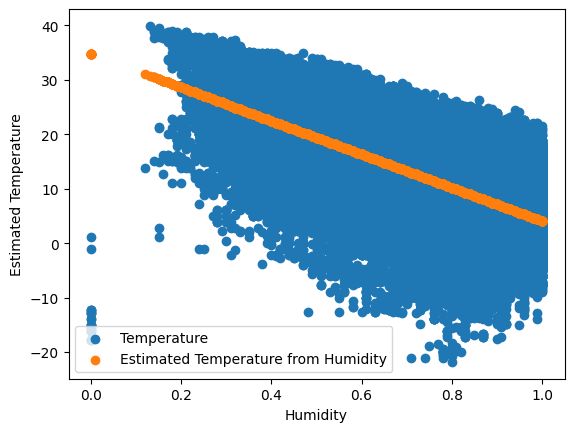

In [545]:
plt.figure()
plt.scatter(df.iloc[:,2],df.iloc[:,0])
plt.scatter(df.iloc[:,2],modelx.predict(np.array(df.iloc[:,2]).reshape(-1,1)))
plt.xlabel("Humidity")
plt.ylabel("Estimated Temperature")
plt.legend(["Temperature","Estimated Temperature from Humidity"])

We can observe that the estimated temperature from humidity is very poor and there exists overfitting due to insufficient paramters and order of the model.\
Since this problem is strictly, linear regression, we can try to improve the model performance by adding one more feature i.e. Apparent Temperature

In [554]:
x_train,x_test,z_train,z_test = train_test_split(df.iloc[:,[1,2]],df.iloc[:,0],test_size=0.2,shuffle=True)

In [555]:
modelx = LinearRegression(normalize=True)

In [556]:
modelx.fit(np.array(x_train).reshape(len(z_train),2),np.array(z_train).reshape(len(z_train),1))

LinearRegression(normalize=True)

In [564]:
print("Test RMSE is ",mean_squared_error(np.array(z_test).reshape(len(z_test),1),modelx.predict(np.array(x_test).reshape(len(z_test),2)),squared=False))
print("Training R squared is ",modelx.score(np.array(x_train).reshape(len(z_train),2),np.array(z_train).reshape(len(z_train),1)))
print("Testing R squared is ",modelx.score(np.array(x_test).reshape(len(z_test),2),np.array(z_test).reshape(len(z_test),1)))
print("The slope for Apparent Temperature is %f and for Humidity is %f and intercept is %f"%(modelx.coef_[0][0],modelx.coef_[0][1],modelx.intercept_))

Test RMSE is  1.0739516573572263
Training R squared is  0.9870808880902131
Testing R squared is  0.9873735973010332
The slope for Apparent Temperature is 0.857700 and for Humidity is -2.600949 and intercept is 4.531292


As we can see, simply by adding another feature, the performance of the model increased from $40\%$ to $98\%$

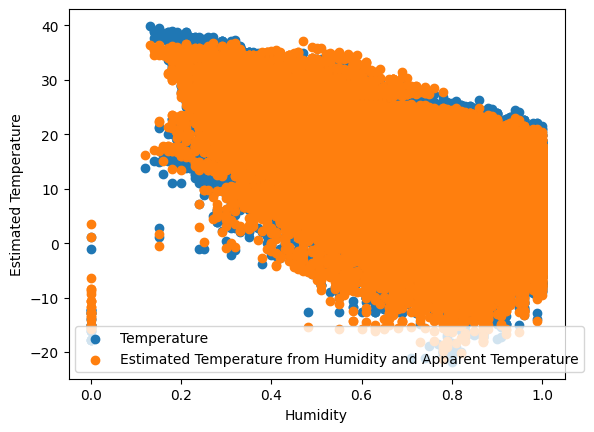

In [560]:
plt.figure()
plt.scatter(df.iloc[:,2],df.iloc[:,0])
plt.scatter(df.iloc[:,2],modelx.predict(np.array(df.iloc[:,[1,2]]).reshape(-1,2)))
plt.xlabel("Humidity")
plt.ylabel("Estimated Temperature")
plt.legend(["Temperature","Estimated Temperature from Humidity and Apparent Temperature"])

We can quickly verify our model using cross validation to confirm generalization. We again use a 3 fold cross validation to get the answers.

In [561]:
cross_model = ShuffleSplit(n_splits=3,test_size=0.3)
scores = cross_val_score(modelx,df.iloc[:,[1,2]],df.iloc[:,0],cv=cross_model)

In [563]:
print("R squared of 3 Fold Cross Validation is %f\n%f\n%f"%(scores[0],scores[1],scores[2]))

R squared of 3 Fold Cross Validation is 0.987214
0.987197
0.986994


We thus see that with 3 fold cross validation, the model accuracy holds well. This shows that adding 1 more parameter can improve the model performance.

<h1> Problem 6

In [566]:
daf = pd.read_csv("C:/Users/osave/Downloads/HW1_P6_candy-data.csv")

In this example, we start by importing the data. A quick peek at the data shows the features.\
We observe that the feature "competitor name" is nothing but a name attribute and would not contribute towards the model performance.

In [567]:
df = pd.DataFrame(daf, columns=["competitorname","sugarpercent","pricepercent","winpercent"])
df.head()

,competitorname,sugarpercent,pricepercent,winpercent
0,100 Grand,0.732,0.860,66.971725
1,3 Musketeers,0.604,0.511,67.602936
2,One dime,0.011,0.116,32.261086
3,One quarter,0.011,0.511,46.116505
4,Air Heads,0.906,0.511,52.341465


As described in the problem set, the "winpercent" column should be conditioned to match the following such that if it is higher than 50 set it to 1 or "win" and 0 or "loose" otherwise.

In [568]:
df_check = df.winpercent>50
df.loc[df_check,"winpercent"] = 1
df.loc[~df_check,"winpercent"] = 0

In [569]:
df.head()

,competitorname,sugarpercent,pricepercent,winpercent
0,100 Grand,0.732,0.860,1.0
1,3 Musketeers,0.604,0.511,1.0
2,One dime,0.011,0.116,0.0
3,One quarter,0.011,0.511,0.0
4,Air Heads,0.906,0.511,1.0


A quick peek shows that the operature on "winpercent" was successful.

In [570]:
from sklearn.linear_model import LogisticRegression #import LogisticRegression

In order to exploit the relation between the 3 parameters, we need a correlation matrix.\
While there exists some relation between the parameters (all direct), the relationship is not strong enough to drive a successful model.

In [571]:
df.corr()

,sugarpercent,pricepercent,winpercent
sugarpercent,1.000000,0.329706,0.182316
pricepercent,0.329706,1.000000,0.361357
winpercent,0.182316,0.361357,1.000000


Let's visualize this data.\
First we visualize sugarpercent vs winpercent

Text(0, 0.5, 'Popular or Not')

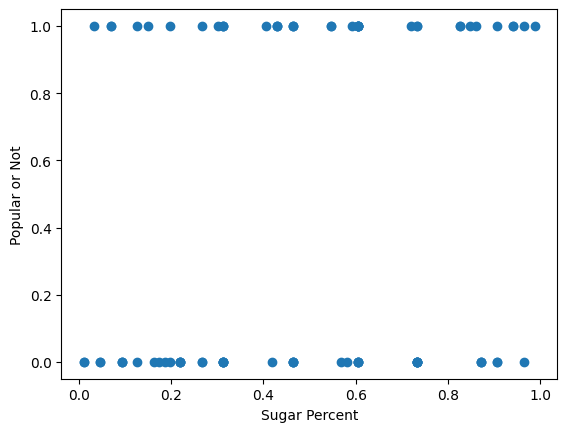

In [575]:
plt.figure()
plt.scatter(df.iloc[:,1],df.iloc[:,3])
plt.xlabel("Sugar Percent")
plt.ylabel("Popular or Not")

The plot shows that the relationship is not very apparent and is very random.\
Lets plot pricepercent and winpercent.

Text(0, 0.5, 'Popular or Not')

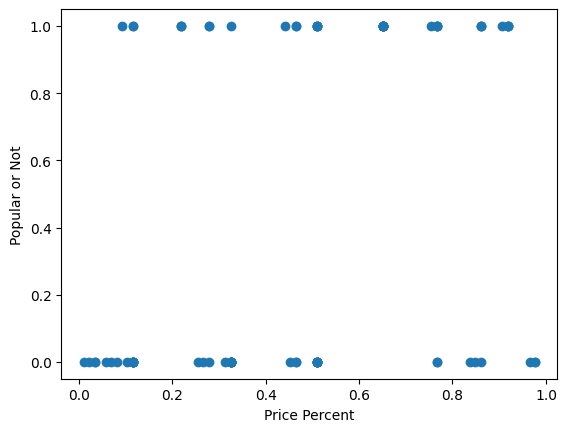

In [576]:
plt.figure()
plt.scatter(df.iloc[:,2],df.iloc[:,3])
plt.xlabel("Price Percent")
plt.ylabel("Popular or Not")

Even this plot shows mostly random relation between the two variables.\
Hence this could get slightly difficult since there does not exist a clear relationship.

Now we explore how different parameters of modelling can affect the performance of the Logistic regression model.\
First, we explore effect of Optimizers.\
For this, please change the "penalty","solver" parameters in the code block below.\
Available options are "lbfgs" and "newton-cg" for "solver".\
Set "intercept_scaling" to 1, to disable the regularization feature.\
It was observed that changing solver did not improve the performance significantly.\
With only changing the solver, the accuracy was 0.58.

Second, we explore how changing learning rate would affect the model.\
Since the parameter for learning rate is not available in logistic regression for this package, we alternately explore the "intercept_scaling" parameter which provides regularization to the model.\
It was found that setting the parameter to 0.5 improves the classification accuracy.\
It was observed that adding "intercept_scaling" from 1 to 0 improved, improved prediction accuracy from 0.58 to 0.7.

In [639]:
modelx = LogisticRegression(penalty="l2",solver="newton-cg",intercept_scaling=0.5,fit_intercept=True)

In [644]:
x_train,x_test,z_train,z_test = train_test_split(df.iloc[:,[1,2]],df.iloc[:,3],test_size=0.4,shuffle=True)

In [645]:
modelx.fit(np.array(x_train).reshape(len(z_train),2),np.array(z_train).reshape(len(z_train),1))

LogisticRegression(intercept_scaling=0.5, solver='newton-cg')

In [646]:
modelx.predict_proba(np.array(x_test).reshape(len(z_test),2)) #Probability of popular (1) and unpopular (0). Class with higher probability is chosen as the prediction class.

array([[0.62972004, 0.37027996],
       [0.62972004, 0.37027996],
       [0.50634668, 0.49365332],
       [0.35416754, 0.64583246],
       [0.59267675, 0.40732325],
       [0.64568898, 0.35431102],
       [0.51524414, 0.48475586],
       [0.49922609, 0.50077391],
       [0.53589471, 0.46410529],
       [0.39562273, 0.60437727],
       [0.60953366, 0.39046634],
       [0.38754483, 0.61245517],
       [0.51218896, 0.48781104],
       [0.40970234, 0.59029766],
       [0.51077624, 0.48922376],
       [0.43832943, 0.56167057],
       [0.58218031, 0.41781969],
       [0.64554679, 0.35445321],
       [0.50634668, 0.49365332],
       [0.59605969, 0.40394031],
       [0.62468918, 0.37531082],
       [0.50634668, 0.49365332],
       [0.66160464, 0.33839536],
       [0.586524  , 0.413476  ],
       [0.48256086, 0.51743914],
       [0.50634668, 0.49365332],
       [0.54567888, 0.45432112],
       [0.41359652, 0.58640348],
       [0.47748864, 0.52251136],
       [0.40643443, 0.59356557],
       [0.

This is the score of fit. The value is between 0 and 1 where 1 means 100% correct classification. Thus a value closer to 1 is expected.

In [669]:
print("Prediction Score for Test Set is ")
modelx.score(np.array(x_test).reshape(len(z_test),2),np.array(z_test).reshape(len(z_test),1))

Prediction Score for Test Set is 


0.7352941176470589

In [670]:
print("The model coefficients for Sugar percent are %f\n and for Price Percent are %f.\nThe intercept is %f"%(modelx.coef_[0][0],modelx.coef_[0][1],modelx.intercept_))

The model coefficients for Sugar percent are 0.592993
 and for Price Percent are 2.511947.
The intercept is -1.651951


In order to confirm the above results i.e., addition of "intercept scaling" improves the performance, we need to validate it using cross validation. We again do a 3 fold cross validation to see performance across all 3 folds.

Text(0.5, 1.0, 'Model Performance')

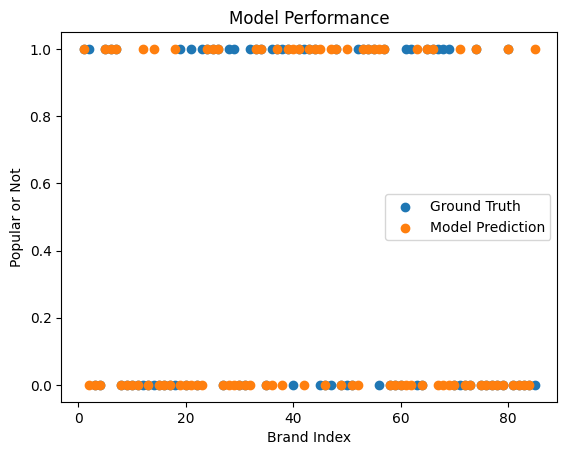

In [674]:
#Plot for model performance
plt.figure()
plt.scatter(np.linspace(1,85,85),df.winpercent)
plt.scatter(np.linspace(1,85,85),modelx.predict(df.iloc[:,[1,2]]))
plt.xlabel('Brand Index')
plt.ylabel("Popular or Not")
plt.legend(["Ground Truth","Model Prediction"])
plt.title("Model Performance")

The above plot shows that
1) When "intercept_scaling" is absent the model performance in predicting popularity is not good (0.58)
2) Including "intercept_scaling" to 0.5, boosts performance of prediciton (0.7).

In [649]:
from sklearn.linear_model import LogisticRegressionCV

In [664]:
modelx = LogisticRegressionCV(cv = cross_model,penalty="l2",solver="lbfgs",intercept_scaling=0.5,fit_intercept=True)

In [665]:
modelx.fit(df.iloc[:,[1,2]],df.iloc[:,3])

LogisticRegressionCV(cv=ShuffleSplit(n_splits=3, random_state=None, test_size=0.3, train_size=None),
                     intercept_scaling=0.5)

In [666]:
scores = cross_val_score(modelx,df.iloc[:,[1,2]],df.iloc[:,3],cv=cross_model)

In [667]:
print("Prediction Score for Set1 is %f\nSet2 is %f\nSet3 is %f\n "%(scores[0],scores[1],scores[2]))

Prediction Score for Set1 is 0.653846
Set2 is 0.653846
Set3 is 0.692308
 


The cross validation shows same prediction accuracy across all 3 folds. Thus, the model is a good fit.\
However, the poor prediction accuracy is a result of
1) Lack of strong relationship between parameters.
2) Lack of data points.

Improving the following two attributes can improve the results.